# 1. Setup

In [1]:
!pip install bioinfokit
!pip install pingouin
!pip install dfply
from bioinfokit.analys import stat
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.graphics.factorplots import interaction_plot
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from pingouin import ancova

# 2. Import Dataset #

In [2]:
df = pd.read_csv('data/diabetes (2).csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [4]:
df.shape

(768, 9)

# 3. Data Description #

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# 4. Descriptive Data Analysis #

## 4.1 Data Cleaning ##

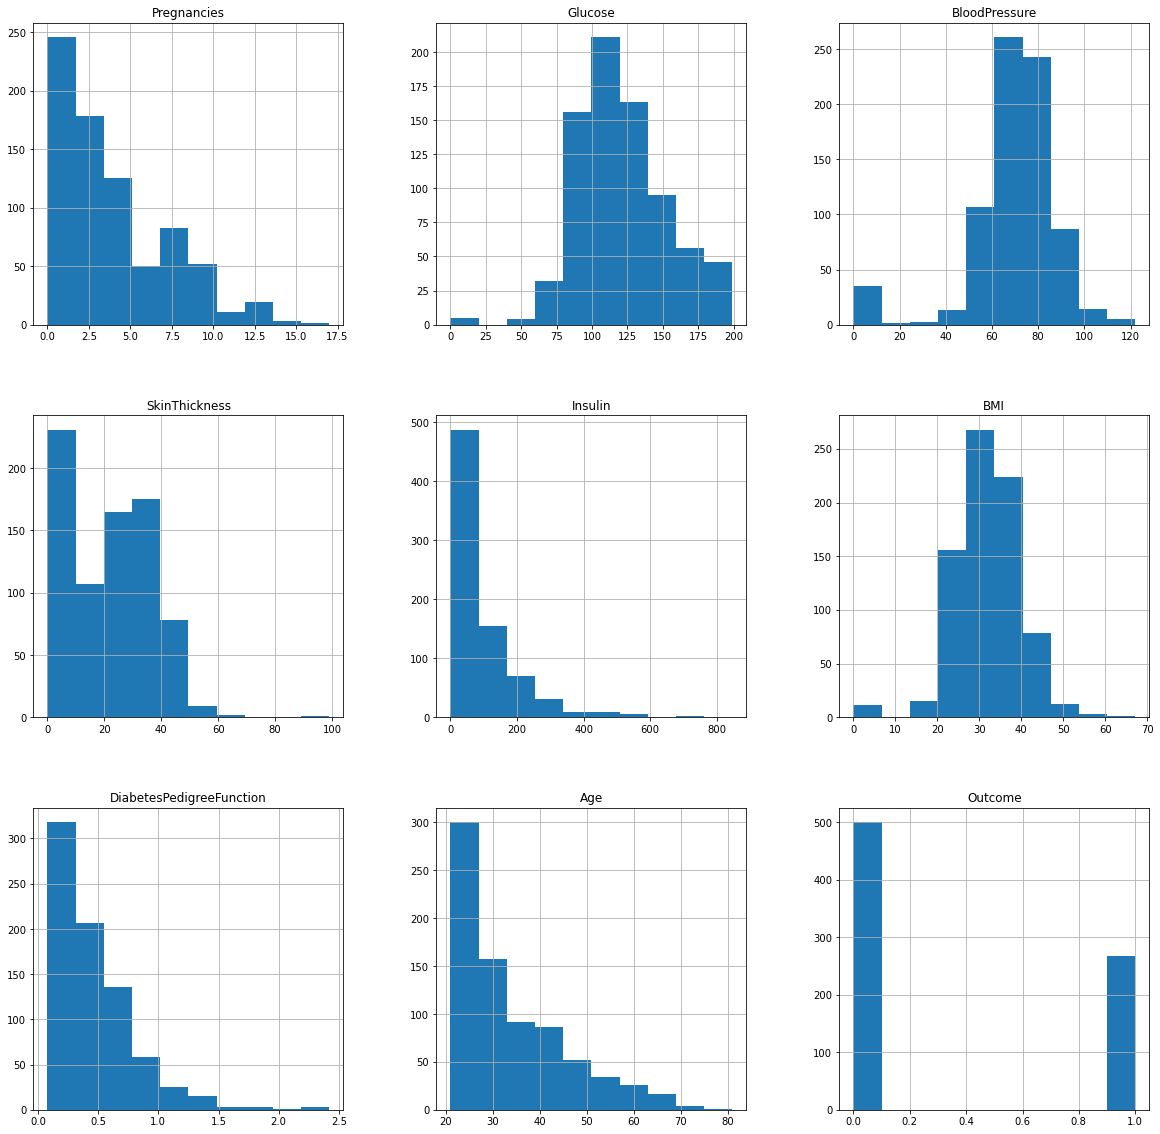

In [10]:
hplot = df.hist(figsize = (20,20))

In [11]:
# Replace missing values with NaN

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [12]:
df.shape

(768, 9)

In [13]:
# Fill in missing values with means or medians based on outcome

df['Glucose'].fillna(df.groupby('Outcome')['Glucose'].transform('mean'), inplace = True)
df['BloodPressure'].fillna(df.groupby('Outcome')['BloodPressure'].transform('mean'), inplace = True)
df['SkinThickness'].fillna(df.groupby('Outcome')['SkinThickness'].transform('median'), inplace = True)
df['Insulin'].fillna(df.groupby('Outcome')['Insulin'].transform('median'), inplace = True)
df['BMI'].fillna(df.groupby('Outcome')['BMI'].transform('median'), inplace = True)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [14]:
df.isin([0]).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [15]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.697358      72.428141      29.089844  141.753906   
std       3.369578   30.462008      12.106044       8.890820   89.100847   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  102.500000   
50%       3.000000  117.000000      72.000000      28.000000  102.500000   
75%       6.000000  141.000000      80.000000      32.000000  169.500000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.434635                  0.471876   33.240885    0.348958  
std      6.880498                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## 4.2 Data Processing ##

### 4.2.1 Categorize continuous variables ###

***Categorize BMI into binary groups***

In [16]:
def get_category(x):
    if x > 25:
        return 'Overweight'
    else:
        return 'Non-overweight'
df['Category'] = df.BMI.apply(get_category)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome        Category  
0                     0.627   50        1      Overweight  
1                     0.351   31        0      Overweight  
2                     0.672   32        1  Non-overweight  
3                     0.167   21        0      Overweight  
4                     2.288   33        1      Overweight

In [17]:
# check the segmented counts

df.groupby('Category').size()

Category
Non-overweight    112
Overweight        656
dtype: int64

***Categorize BMI into 4 bins***

In [18]:
def get_weight(x):
    if x < 18.5:
        return 'Underweight'
    elif 18.5 <= x < 25:
        return 'Healthy'
    elif 25 <= x < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['Weight'] = df.BMI.apply(get_weight)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome        Category      Weight  
0                     0.627   50        1      Overweight       Obese  
1                     0.351   31        0      Overweight  Overweight  
2                     0.672   32        1  Non-overweight     Healthy  
3                     0.167   21        0      Overweight  Overweight  
4                     2.288   33        1      Overweight       Obese

In [19]:
# check the segmented counts

df.groupby('Weight').size()

Weight
Healthy        102
Obese          483
Overweight     179
Underweight      4
dtype: int64

***Categorize age into 3 groups***

(0.0, 81.0)

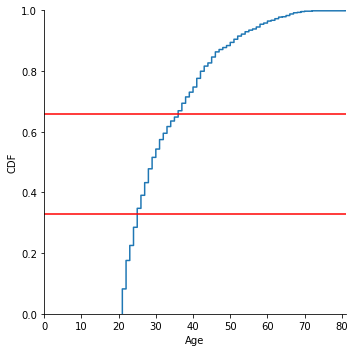

In [20]:
sns.displot(data=df, x='Age', kind='ecdf')
plt.xlabel('Age')
plt.ylabel('CDF')
plt.axhline(0.33, color='red')
plt.axhline(0.66, color='red')
plt.xlim(0, df.Age.max())

In [21]:
def get_age_group(x):
    if x < 25:
        return 'Group1'
    elif 25 <= x < 35:
        return 'Group2'
    else:
        return 'Group3'

df['AgeGroup'] = df.Age.apply(get_age_group)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome        Category      Weight AgeGroup  
0                     0.627   50        1      Overweight       Obese   Group3  
1                     0.351   31        0      Overweight  Overweight   Group2  
2                     0.672   32        1  Non-overweight     Healthy   Group2  
3                     0.167   21        0      Overweight  Overweight   Group1  
4                     2.288   33        1      Overweight       Obese   Group2

In [22]:
# check the segmented counts

df.groupby('AgeGroup').size()

AgeGroup
Group1    219
Group2    269
Group3    280
dtype: int64

### 4.2.2 Reduce dataset dimension ###

In [23]:
# focus on these columns
cols = ['BloodPressure', 'BMI', 'Age', 'Category', 'Weight', 'AgeGroup']

In [24]:
data = df[cols]
data.head()

BloodPressure   BMI  Age        Category      Weight AgeGroup
0           72.0  33.6   50      Overweight       Obese   Group3
1           66.0  26.6   31      Overweight  Overweight   Group2
2           64.0  23.3   32  Non-overweight     Healthy   Group2
3           66.0  28.1   21      Overweight  Overweight   Group1
4           40.0  43.1   33      Overweight       Obese   Group2

In [25]:
data.shape

(768, 6)

In [26]:
data.info

<bound method DataFrame.info of      BloodPressure   BMI  Age        Category      Weight AgeGroup
0             72.0  33.6   50      Overweight       Obese   Group3
1             66.0  26.6   31      Overweight  Overweight   Group2
2             64.0  23.3   32  Non-overweight     Healthy   Group2
3             66.0  28.1   21      Overweight  Overweight   Group1
4             40.0  43.1   33      Overweight       Obese   Group2
..             ...   ...  ...             ...         ...      ...
763           76.0  32.9   63      Overweight       Obese   Group3
764           70.0  36.8   27      Overweight       Obese   Group2
765           72.0  26.2   30      Overweight  Overweight   Group2
766           60.0  30.1   47      Overweight       Obese   Group3
767           70.0  30.4   23      Overweight       Obese   Group1

[768 rows x 6 columns]>

## 4.3 Exploratory Data Analysis ##

In [27]:
# Set up plotting environment
import plotly.express as px

### 4.3.1 Data summary

In [28]:
data.describe()

BloodPressure         BMI         Age
count     768.000000  768.000000  768.000000
mean       72.428141   32.434635   33.240885
std        12.106044    6.880498   11.760232
min        24.000000   18.200000   21.000000
25%        64.000000   27.500000   24.000000
50%        72.000000   32.050000   29.000000
75%        80.000000   36.600000   41.000000
max       122.000000   67.100000   81.000000

In [29]:
data.corr()

BloodPressure       BMI       Age
BloodPressure       1.000000  0.286062  0.324439
BMI                 0.286062  1.000000  0.027849
Age                 0.324439  0.027849  1.000000

### 4.3.2 Data visualization

<AxesSubplot:xlabel='Weight', ylabel='count'>

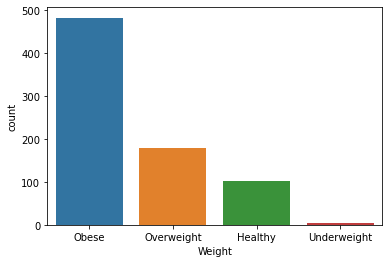

In [30]:
sns.countplot(data=data, x='Weight')

<AxesSubplot:xlabel='Weight', ylabel='count'>

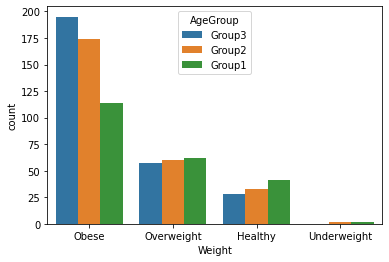

In [31]:
sns.countplot(data=data, x='Weight', hue='AgeGroup')

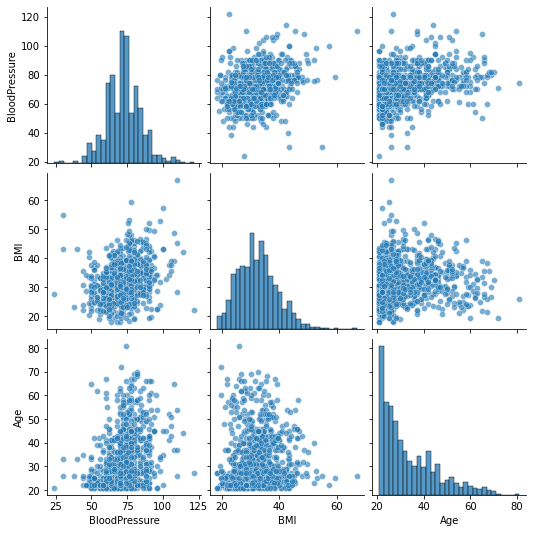

In [32]:
sns.pairplot(data, plot_kws={'alpha': 0.6}, diag_kws={'bins': 30})

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

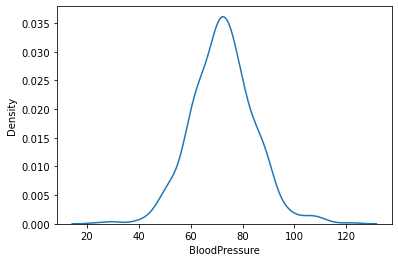

In [33]:
sns.kdeplot(data['BloodPressure'])

In [34]:
fig = px.histogram(data, x='BloodPressure', 
                   color='Category', 
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )
fig.show()

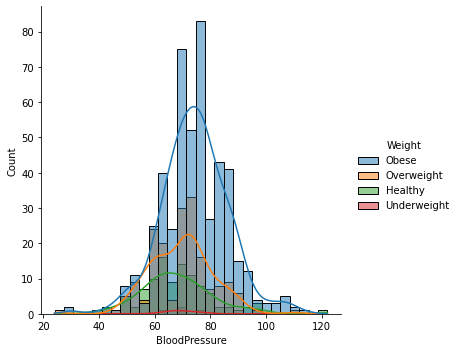

In [35]:
sns.displot(data=data, x='BloodPressure', hue='Weight', kde=True)

array([[<AxesSubplot:title={'center':'Healthy'}>,
        <AxesSubplot:title={'center':'Obese'}>],
       [<AxesSubplot:title={'center':'Overweight'}>,
        <AxesSubplot:title={'center':'Underweight'}>]], dtype=object)

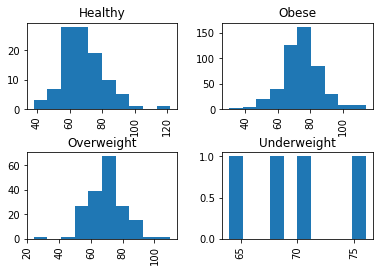

In [36]:
data['BloodPressure'].hist(by=data['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='BloodPressure'>

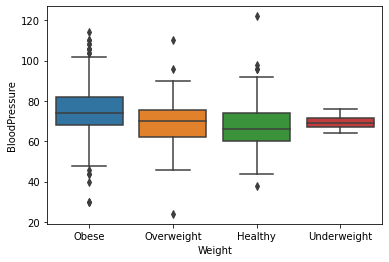

In [37]:
# How is blood pressure distributed for each weight group

sns.boxplot(data=data, x='Weight', y='BloodPressure')

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

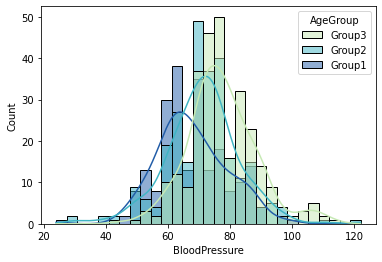

In [38]:
sns.set_palette("bright")
sns.histplot(data=data, x='BloodPressure', hue='AgeGroup', kde=True, palette='YlGnBu')

array([[<AxesSubplot:title={'center':'Group1'}>,
        <AxesSubplot:title={'center':'Group2'}>],
       [<AxesSubplot:title={'center':'Group3'}>, <AxesSubplot:>]],
      dtype=object)

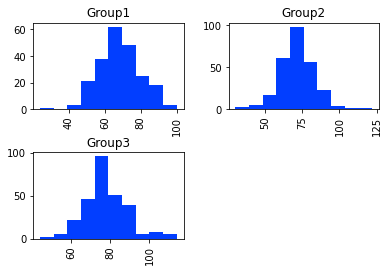

In [39]:
data['BloodPressure'].hist(by=data['AgeGroup'])

<AxesSubplot:xlabel='AgeGroup', ylabel='BloodPressure'>

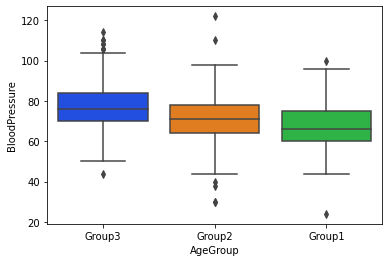

In [40]:
# How is blood pressure distributed for each age category

sns.boxplot(data=data, x='AgeGroup', y='BloodPressure')

<AxesSubplot:xlabel='Age', ylabel='BloodPressure'>

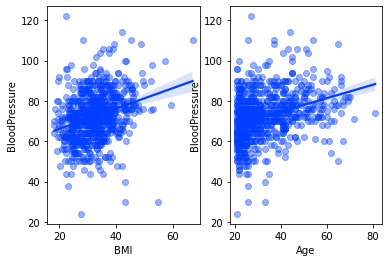

In [41]:
fig, ax = plt.subplots(1, 2)
sns.regplot(data=data, x='BMI', y='BloodPressure', ax=ax[0], scatter_kws={'alpha': 0.4})
sns.regplot(data=data, x='Age', y='BloodPressure', ax=ax[1], scatter_kws={'alpha': 0.4})

# 5. Inferential Statistical Modeling

## 5.1 T-test

In [42]:
# Set up testing environment
from scipy import stats

In [43]:
non_overweight = data[data['Category']=='Non-overweight']
overweight = data[data['Category']=='Overweight']

In [44]:
tStat, pValue =  sp.stats.ttest_ind(non_overweight['BloodPressure'], overweight['BloodPressure'], equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:8.508825922329076e-05 T-Statistic:-4.04095046988209


## 5.2 One-way ANOVA ##

In [45]:
# Set up testing environment
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,MultiComparison)
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot

### 5.2.1 ANOVA table ###

In [46]:
data1 = data[['BloodPressure', 'Weight']]
data1.head()

BloodPressure      Weight
0           72.0       Obese
1           66.0  Overweight
2           64.0     Healthy
3           66.0  Overweight
4           40.0       Obese

In [47]:
model = ols('BloodPressure ~ C(Weight)', data=data1).fit()
table = sm.stats.anova_lm(model, typ=2)
table

sum_sq     df          F        PR(>F)
C(Weight)    5431.698497    3.0  12.930563  3.020740e-08
Residual   106976.980671  764.0        NaN           NaN

### 5.2.2 Effect size for weight

In [48]:
eta_sqrd = 5431.698497 / (5431.698497+106976.980671)
print(eta_sqrd)

0.04832098853222956


### 5.2.3 Post-hoc test

In [49]:
res = stat()
res.tukey_hsd(df=data1, res_var='BloodPressure', xfac_var='Weight', anova_model='BloodPressure~C(Weight)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



group1       group2      Diff      Lower      Upper   q-value  p-value
0       Obese   Overweight  4.901820   2.235828   7.567812  6.694913  0.00100
1       Obese      Healthy  6.381270   3.061299   9.701240  6.998731  0.00100
2       Obese  Underweight  4.943884 -10.352573  20.240341  1.176857  0.81817
3  Overweight      Healthy  1.479450  -2.300243   5.259143  1.425247  0.71965
4  Overweight  Underweight  0.042065 -15.360710  15.444839  0.009944  0.90000
5     Healthy  Underweight  1.437385 -14.091947  16.966717  0.337029  0.90000

## 5.3 Two-way ANOVA ##

In [50]:
# Set up testing environment
import statsmodels as sm
import statsmodels.api as sm
from bioinfokit.analys import stat

### 5.3.1 ANOVA table

In [51]:
data2 = data[['BloodPressure', 'Weight', 'AgeGroup']]
data2.head()

BloodPressure      Weight AgeGroup
0           72.0       Obese   Group3
1           66.0  Overweight   Group2
2           64.0     Healthy   Group2
3           66.0  Overweight   Group1
4           40.0       Obese   Group2

In [52]:
model_2 = ols('BloodPressure~C(Weight)+C(AgeGroup)', data=data2).fit()
table_2 = sm.stats.anova_lm(model_2, typ = 2)
table_2

sum_sq     df          F        PR(>F)
C(Weight)     3509.228840    3.0   9.233631  5.276086e-06
C(AgeGroup)  10444.632627    2.0  41.223539  1.001718e-17
Residual     96532.348044  762.0        NaN           NaN

### 5.3.2 Modelling the interaction term ###

In [53]:
model_3 = ols('BloodPressure~C(Weight)+C(AgeGroup)+C(Weight)*C(AgeGroup)', data=data2).fit()
table_3 = sm.stats.anova_lm(model_3, typ=2)
table_3

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5



sum_sq     df         F    PR(>F)
C(Weight)               3794.339394    3.0  9.994117  0.000052
C(AgeGroup)             1294.223180    2.0  5.113387  0.024025
C(Weight):C(AgeGroup)    878.592783    6.0  1.157087  0.328748
Residual               95800.187391  757.0       NaN       NaN

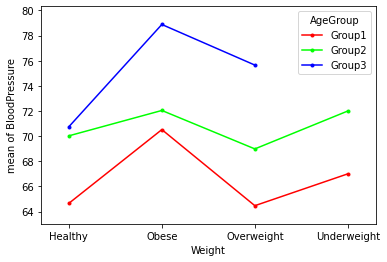

In [54]:
fig = interaction_plot(x=data2['Weight'], trace=data2['AgeGroup'], response=data2['BloodPressure'])
plt.show()

### 5.3.3 Effect size

In [55]:
SS_weight = 3794.339394
SS_age = 1294.223180
SS_interaction = 878.592783
SS_residual = 95800.187391
total_SS = SS_weight + SS_age + SS_interaction + SS_residual
print(total_SS)

101767.342748


In [56]:
eta_weight = SS_weight / total_SS
print(eta_weight)

0.03728444991823832


In [57]:
eta_age = SS_age / total_SS
print(eta_age)

0.012717470507260886


In [58]:
eta_interaction = SS_interaction / total_SS
print(eta_interaction)

0.008633346997922542


### 5.3.4 Post-hoc test ###

In [59]:
# For main effect AgeGroup

res.tukey_hsd(df=data2, res_var='BloodPressure', xfac_var='AgeGroup', anova_model='BloodPressure~C(Weight)+C(AgeGroup)+C(Weight):C(AgeGroup)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:402: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5



group1  group2      Diff     Lower      Upper    q-value   p-value
0  Group3  Group2  6.299935  4.044472   8.555398   9.276514  0.001000
1  Group3  Group1  9.736317  7.353152  12.119481  13.568294  0.001000
2  Group2  Group1  3.436382  1.031928   5.840835   4.746456  0.002391

In [60]:
# For interaction effect between Weight and AgeGroup

res.tukey_hsd(df=data2, res_var='BloodPressure', xfac_var=['Weight','AgeGroup'], anova_model='BloodPressure~C(Weight)+C(AgeGroup)+C(Weight):C(AgeGroup)')
res.tukey_summary

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:368: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1871: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 6, but rank is 5

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:862: RuntimeWarning:

divide by zero encountered in true_divide

/opt/conda/lib/python3.8/site-packages/bio


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.


/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:869: RuntimeWarning:

divide by zero encountered in true_divide

/opt/conda/lib/python3.8/site-packages/bioinfokit/analys.py:872: RuntimeWarning:

divide by zero encountered in true_divide



group1                 group2       Diff      Lower  \
0         (Obese, Group3)        (Obese, Group2)   6.840859   2.994766   
1         (Obese, Group3)        (Obese, Group1)   8.363379   4.015194   
2         (Obese, Group3)   (Overweight, Group3)   3.229648  -2.323561   
3         (Obese, Group3)   (Overweight, Group2)   9.899701   4.454979   
4         (Obese, Group3)   (Overweight, Group1)  14.416495   9.039347   
..                    ...                    ...        ...        ...   
61      (Healthy, Group1)  (Underweight, Group2)   7.347447 -19.359598   
62      (Healthy, Group1)  (Underweight, Group1)   2.347447 -24.359598   
63  (Underweight, Group3)  (Underweight, Group2)        NaN        NaN   
64  (Underweight, Group3)  (Underweight, Group1)        NaN        NaN   
65  (Underweight, Group2)  (Underweight, Group1)   5.000000 -31.880648   

        Upper    q-value   p-value  
0   10.686952   8.246491  0.001000  
1   12.711565   8.917683  0.001000  
2    8.782858   2.696432  0.726481  
3   15.344423   8.429944  0.001000  
4   19.793642  12.430426  0.001000  
..        ...        ...       ...  
61  34.054492   1.275525  0.900000  
62  29.054492   0.407519  0.900000  
63        NaN        NaN  0.556613  
64        NaN        NaN  0.556613  
65  41.880648   0.628564  0.900000  

[66 rows x 7 columns]

In [61]:
post_hoc = res.tukey_summary[res.tukey_summary['p-value']<0.05]
post_hoc

group1                group2       Diff     Lower  \
0        (Obese, Group3)       (Obese, Group2)   6.840859  2.994766   
1        (Obese, Group3)       (Obese, Group1)   8.363379  4.015194   
3        (Obese, Group3)  (Overweight, Group2)   9.899701  4.454979   
4        (Obese, Group3)  (Overweight, Group1)  14.416495  9.039347   
5        (Obese, Group3)     (Healthy, Group3)   8.136639  0.683235   
6        (Obese, Group3)     (Healthy, Group2)   8.859389  1.917276   
7        (Obese, Group3)     (Healthy, Group1)  14.229705  7.893266   
14       (Obese, Group2)  (Overweight, Group1)   7.575636  2.120770   
17       (Obese, Group2)     (Healthy, Group1)   7.388846  0.986322   
23       (Obese, Group1)  (Overweight, Group1)   6.053116  0.233335   
31  (Overweight, Group3)  (Overweight, Group1)  11.186846  4.419183   
34  (Overweight, Group3)     (Healthy, Group1)  11.000057  3.447705   

        Upper    q-value   p-value  
0   10.686952   8.246491  0.001000  
1   12.711565   8.917683  0.001000  
3   15.344423   8.429944  0.001000  
4   19.793642  12.430426  0.001000  
5   15.590043   5.061377  0.018872  
6   15.801503   5.916848  0.001893  
7   20.566145  10.411874  0.001000  
14  13.030501   6.438924  0.001000  
17  13.791370   5.350615  0.009095  
23  11.872896   4.822260  0.033170  
31  17.954510   7.663854  0.001000  
34  18.552409   6.752911  0.001000

## 5.4 Test ANOVA Assumptions ##

### 5.4.1 Normality ###

***The Shapiro-Wilk***

In [62]:
stats.shapiro(data['BloodPressure'])

ShapiroResult(statistic=0.9886093139648438, pvalue=1.1095724403276108e-05)

***Qqplot***

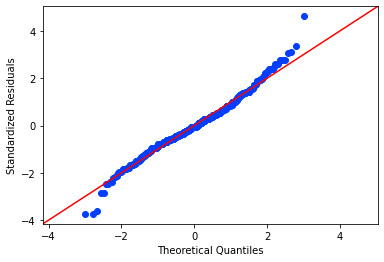

In [63]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

***Distribution***

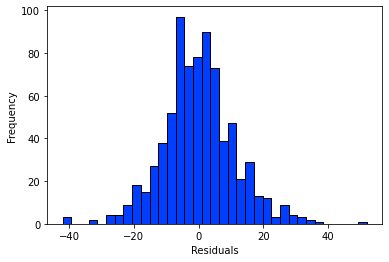

In [64]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

### 5.4.2 Homogeneity of variances ###

***The Levene test***

In [65]:
stats.levene(data['BloodPressure'][data['Weight'] == 'Underweight'],
             data['BloodPressure'][data['Weight'] == 'Healthy'],
             data['BloodPressure'][data['Weight'] == 'Overweight'],
             data['BloodPressure'][data['Weight'] == 'Obese'])

LeveneResult(statistic=0.9581420001838002, pvalue=0.4119597761059187)

# 6. Regression

## 6.1 Simple Linear Regression

In [66]:
# Set up testing environment

import statsmodels.api as sm
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [67]:
x = data['BMI']
y = data['BloodPressure']

Text(0, 0.5, 'Blood Pressure')

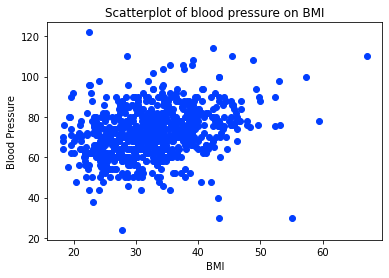

In [68]:
plt.scatter(x, y)
plt.title('Scatterplot of blood pressure on BMI')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')

In [69]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     68.27
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           6.26e-16
Time:                        13:42:07   Log-Likelihood:                -2971.6
No. Observations:                 768   AIC:                             5947.
Df Residuals:                     766   BIC:                             5957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.1032      2.020     27.778      0.0

## 6.2 Multiple Linear-Regression

In [70]:
X = data[['BMI', 'Age']]
Y = data['BloodPressure']

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [72]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression()

In [73]:
print('Intercept: \n', regr.intercept_)

Intercept: 
 45.973615295649


In [74]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [0.49238323 0.31671853]


In [75]:
Y_pred = regr.predict(X_test)

In [76]:
prediction = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_pred})
prediction

Actual  Predicted
661    76.0  74.064664
122    74.0  69.802218
113    62.0  70.632608
14     72.0  74.829748
529    65.0  67.904517
..      ...        ...
476    80.0  71.751768
482    58.0  68.529988
230    86.0  74.606285
527    74.0  66.524539
380    72.0  68.740264

[154 rows x 2 columns]

In [77]:
print('MAE:',metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test,Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print("R-Squared:",r2_score(Y_test, Y_pred))

MAE: 8.593437782410797
MSE: 127.59283730073531
RMSE: 11.295699947357637
R-Squared: 0.1689467105459448


# 7. ANCOVA

## 7.1 Data Preparation

In [78]:
data.drop(['Weight', 'AgeGroup'], axis=1, inplace=True)
data.head()

/tmp/ipykernel_316/1250133176.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



BloodPressure   BMI  Age        Category
0           72.0  33.6   50      Overweight
1           66.0  26.6   31      Overweight
2           64.0  23.3   32  Non-overweight
3           66.0  28.1   21      Overweight
4           40.0  43.1   33      Overweight

In [79]:
data.groupby('Category').size()

Category
Non-overweight    112
Overweight        656
dtype: int64

In [80]:
Overweight = data[data['Category']=='Overweight'].sample(n=100)
Non_overweight = data[data['Category']=='Non-overweight'].sample(n=100)
frames = [Overweight, Non_overweight]
data3 = pd.concat(frames, ignore_index=True)
data3.shape

(200, 4)

In [81]:
data3.head()

BloodPressure   BMI  Age    Category
0           72.0  33.6   50  Overweight
1           60.0  35.5   24  Overweight
2           80.0  33.7   29  Overweight
3           52.0  36.0   25  Overweight
4           86.0  27.5   22  Overweight

In [82]:
data3.groupby('Category').size()

Category
Non-overweight    100
Overweight        100
dtype: int64

In [83]:
from dfply import *
data3 >> group_by(X.Category) >> summarize(n=X['BloodPressure'].count(), mean =X['BloodPressure'].mean(), std =X['BloodPressure'].std())

Category    n      mean        std
0  Non-overweight  100  68.35264  12.541341
1      Overweight  100  72.01719  11.772930

## 7.2 Data Visualization

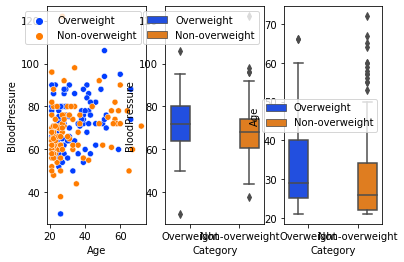

In [84]:
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=data3, x='Age', y='BloodPressure', hue=data3.Category.tolist(), ax=axs[0])
sns.boxplot(data=data3, x='Category', y='BloodPressure', hue=data3.Category.tolist(), ax=axs[1])
sns.boxplot(data=data3, x='Category', y='Age', hue=data3.Category.tolist(), ax=axs[2])
plt.show()

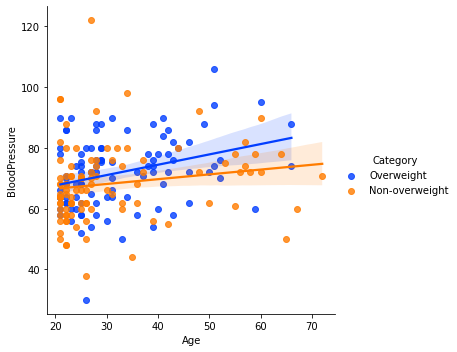

In [85]:
sns.lmplot(x='Age', y='BloodPressure', data=data3, hue='Category')

## 7.3 ANCOVA Table

In [86]:
# ANCOVA using Statsmodels

In [87]:
model_4 = ols(formula='BloodPressure ~ Category + Age', data=data3, subset=None, drop_cols=None).fit()
print(model_4.summary())
table_4 = sm.stats.anova_lm(model_4, typ=2)
print(table_4)

                            OLS Regression Results                            
Dep. Variable:          BloodPressure   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     7.909
Date:                Tue, 12 Apr 2022   Prob (F-statistic):           0.000497
Time:                        13:42:08   Log-Likelihood:                -777.01
No. Observations:                 200   AIC:                             1560.
Df Residuals:                     197   BIC:                             1570.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 61

In [88]:
# ANCOVA using Pingouin

In [89]:
ancova(data=data3, dv='BloodPressure', covar='Age', between='Category')

Source            SS   DF          F     p-unc       np2
0  Category    553.182632    1   3.928903  0.048853  0.019554
1       Age   1555.575641    1  11.048262  0.001058  0.053104
2  Residual  27737.250164  197        NaN       NaN       NaN

## 7.4 Test ANCOVA Assumptions

### 7.4.1 Linearity

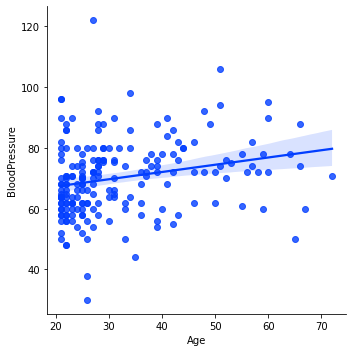

In [90]:
sns.lmplot(x='Age', y='BloodPressure', data=data3)

### 7.4.2 Homogeneity of regression slopes

In [91]:
interaction_model = ols('BloodPressure ~ Age * Category', data=data3).fit()
table_5 = sm.stats.anova_lm(interaction_model, typ=3)
table_5

sum_sq     df           F        PR(>F)
Intercept     60795.808835    1.0  433.238952  1.557692e-51
Category         38.447891    1.0    0.273985  6.012625e-01
Age             437.600012    1.0    3.118395  7.896986e-02
Age:Category    232.847605    1.0    1.659303  1.992161e-01
Residual      27504.402559  196.0         NaN           NaN

### 7.4.3 Homogeneity of variances

In [93]:
data3['Residual'] = model_4.resid
resi_over = data3.loc[data3.Category == 'Overweight', 'Residual'].to_list()
resi_non_over = data3.loc[data3.Category == 'Non-overweight', 'Residual'].to_list()
stats.levene(resi_over, resi_non_over)

LeveneResult(statistic=0.0024404637376395514, pvalue=0.9606494884448997)

### 7.4.4 Outliers

<AxesSubplot:xlabel='Category', ylabel='Residual'>

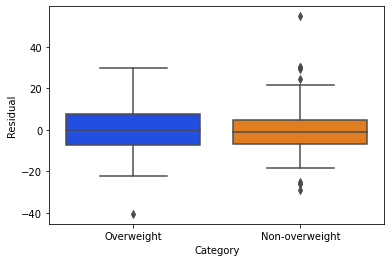

In [95]:
sns.boxplot(x='Category', y='Residual', data=data3)

## 7.5 Power Analysis

In [97]:
# Set up the testing environment

from statsmodels.stats.power import TTestIndPower, TTestPower

### 7.5.1 Sample size

***Sample size***

In [98]:
effect_size = 0.5
alpha = 0.05
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 63.77


***Power curve***

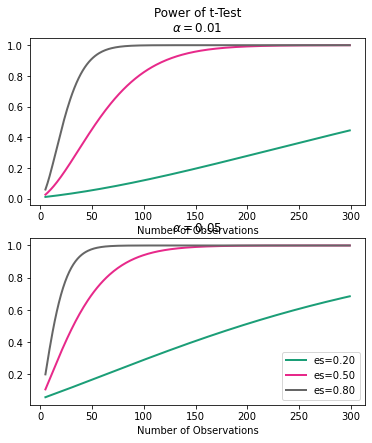

In [99]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(5, 300),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(5, 300),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)

### 7.5.2 Effect size

In [100]:
m1=Overweight['BloodPressure'].mean()
s1=Overweight['BloodPressure'].std()
m2=Non_overweight['BloodPressure'].mean()
s2=Non_overweight['BloodPressure'].std()

In [101]:
n1 = 100       # number of observations of the overweight category
n2 = 100         # number of observations of the non-overweight category

s_pooled = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
cohensd = (m1 - m2)/s_pooled
print('Effect size: {0:.2f}'.format(cohensd))

Effect size: 1.05


### 7.5.3 Statistical power

In [102]:
power = TTestIndPower().solve_power(effect_size = cohensd,
                                    power = None,
                                    nobs1 = n1,
                                    ratio = 1,
                                    alpha = 0.05,
                                    alternative = 'smaller')
print('Power: {0:.50f}'.format(power))

Power: 0.00000000000005359311308722856272521520782037915127
